In [1]:
#scikitlearn 

import numpy as np
import matplotlib.pyplot as plt


# Aprendizaje por mínimos cuadrados

In [56]:
def sse(target, predicted):
    return np.sum(np.power(target-predicted,2))

def rmse(target, predicted):
    return np.sqrt(sse(target,predicted)/len(target))

class LinearRegression():
    
    def __init__(self):
        self.w1 = None
        self.w0 = None
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        n=len(y)+len(x)
        x_= np.mean(x)
        y_= np.mean(y)
        self.w1 = ((n*np.sum(np.matmul(x,y)))-(np.sum(x)*np.sum(y)))/((n*np.sum(pow(x,2)))-(pow(np.sum(x),2)))
        self.w0 = y_-(self.w1*x_)
        print(y)
        print(np.sum(x))
        print("y = {}x + {}".format(self.w1, self.w0))
        print("Error = {}".format(sse(y,self.eval(x))))
    
    def eval(self, x):
        if not (self.w1 == None or self.w0 == None):
            return x*self.w1+self.w0
        
    

In [57]:
X = np.arange(1,8)
Y = np.array([.5, 2.5, 2, 4, 3.5, 6, 5.5])

model = LinearRegression()
model.fit(X,Y)

#model.eval(X)
#LinearRegression()

[0.5 2.5 2.  4.  3.5 6.  5.5]
28
y = 0.8511904761904762x + 0.023809523809523725
Error = 2.995039682539682


In [58]:
model.fit(X,Y)

[0.5 2.5 2.  4.  3.5 6.  5.5]
28
y = 0.8511904761904762x + 0.023809523809523725
Error = 2.995039682539682


<IPython.core.display.Javascript object>


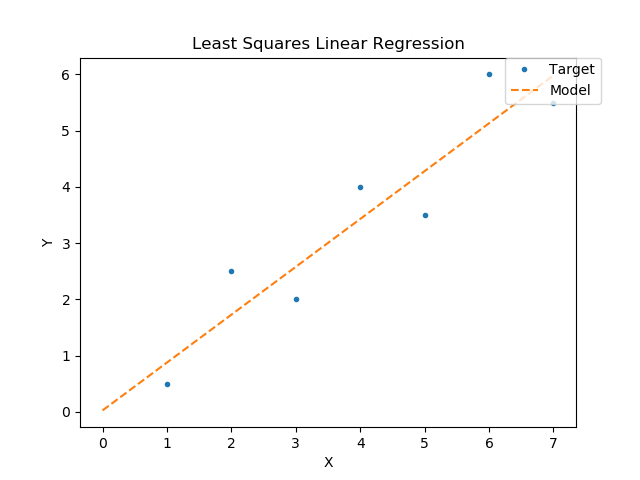

In [59]:
%matplotlib notebook

import matplotlib.pyplot as plt
#fig = plt.figure()
plt.title('Least Squares Linear Regression')
plt.plot(X,Y, '.', label='Target')
plt.plot(np.arange(0,8), model.eval(np.arange(0,8)), '--', label='Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.show()

# Aprendizaje por Gradiente Descendiente

In [60]:
class LinearRegressionGD():
    def __init__(self, max_iter=1000, eta=0.0001, max_error=0.1):
        self.w1 = 0
        self.w0 = 0
        self.max_iter = max_iter
        self.eta = eta
        self.max_error = max_error
        
    def dw0(self, x, y):
        return 2*np.sum(-y+(self.w0+self.w1*x))
    
    def dw1(self, x, y):
        return 2*np.sum((y-(self.w0+self.w1*x))*-x)
    
    def fit(self, x, y):
        w = np.array([self.w0, self.w1])
        for i in range(self.max_iter):
            ym = self.eval(x)
            error = sse(y,ym)
            #print("error={}".format(error))
            w = w - self.eta * np.array([self.dw0[x,y], self.dw1[x,y]])
            self.w0, self.w1 = w
            
            if error <= self.max_error:
                break
        print("y = {}x + {}".format(self.w1, self.w0))
        print("Error = {}".format(sse(y,self.eval(x))))
        
    def eval(self, x):
        if not (self.w1 == None or self.w0 == None):
            return x*self.w1+self.w0

In [61]:
X = np.arange(1,8)
Y = np.array([.5, 2.5, 2, 4, 3.5, 6, 5.5])

modelgd = LinearRegressionGD()
#modelgd.fit(X,Y)
#modelgd.eval(X)

<IPython.core.display.Javascript object>


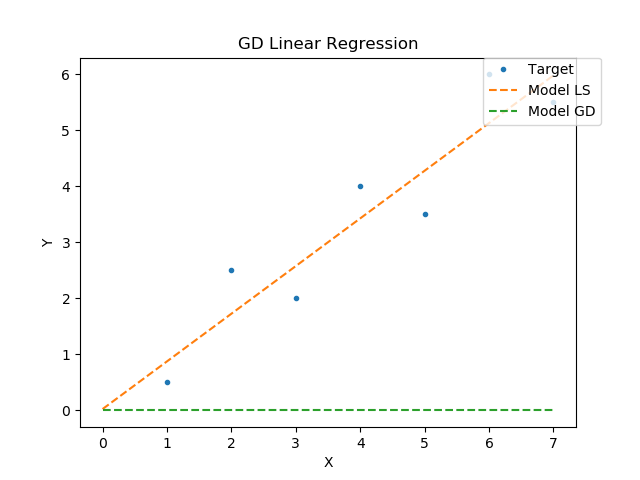

In [62]:
plt.figure()
plt.title('GD Linear Regression')
plt.plot(X,Y, '.', label='Target')
plt.plot(np.arange(0,8), model.eval(np.arange(0,8)), '--', label='Model LS')
plt.plot(np.arange(0,8), modelgd.eval(np.arange(0,8)), '--', label='Model GD')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.show()

In [63]:
error_rel = 100*(sse(Y,model.eval(X))-sse(Y,modelgd.eval(X)))/(sse(Y,model.eval(X)))
print("Error relativo = {}%".format(error_rel))

Error relativo = -3405.7966213978148%
